uploading csv files to the code

In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


working on the datasets

heart dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


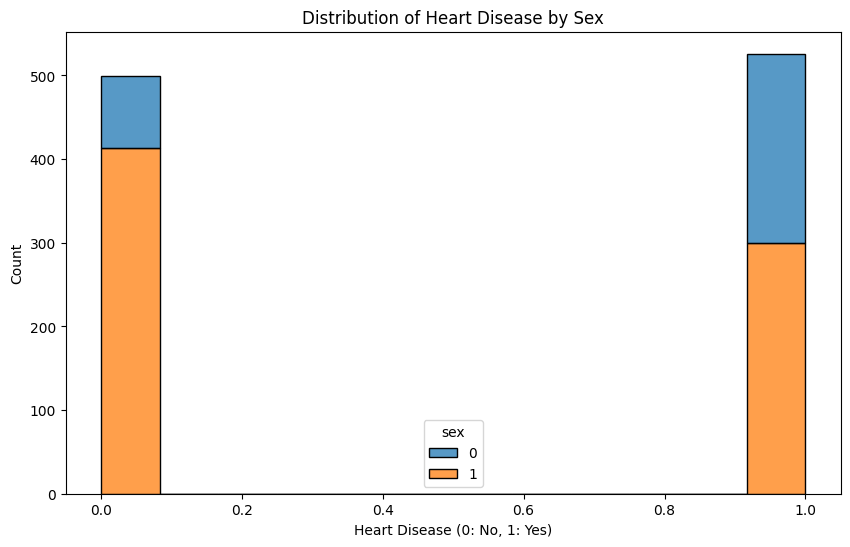

In [9]:



heart = pd.read_csv('heart.csv')



print("heart dataset:")
print(heart.head())



plt.figure(figsize=(10, 6))
sns.histplot(data=heart, x='target', hue='sex', multiple='stack')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Sex')
plt.show()


to check if there are any null or nan values present in the dataset



In [11]:

df = pd.read_csv('heart.csv')
df.isnull().sum()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

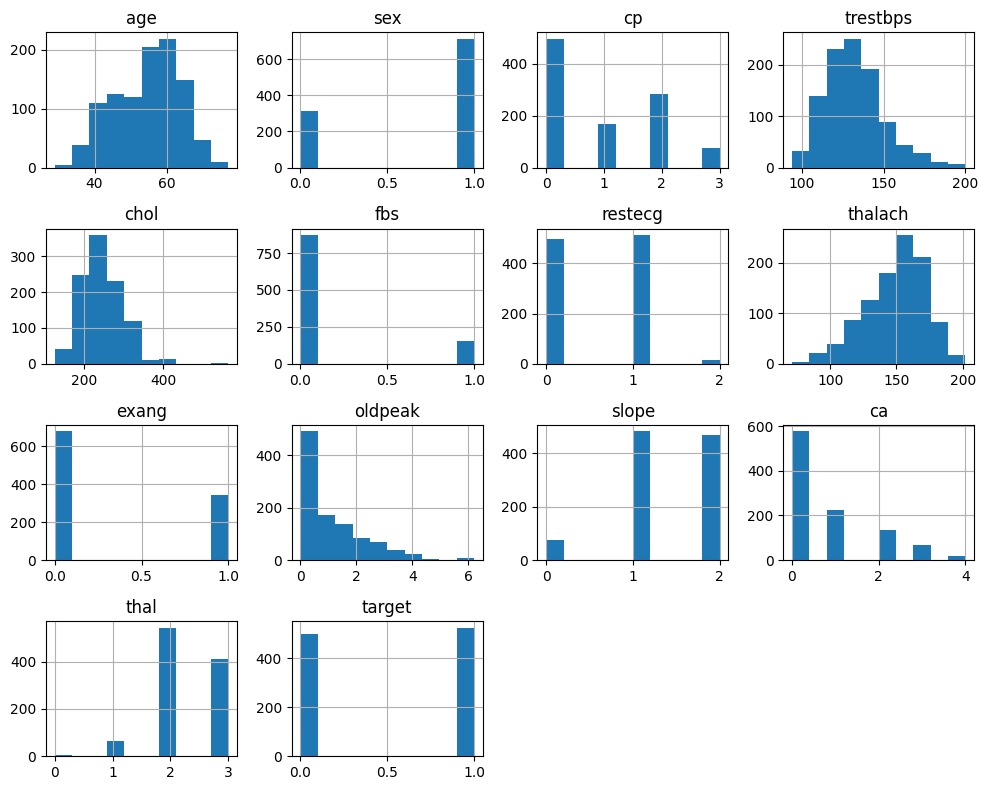

In [37]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

histogram plot

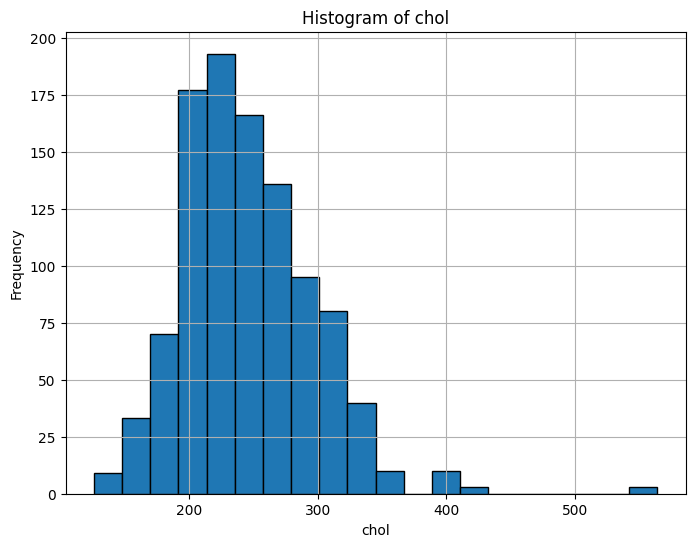

In [20]:






column_name = 'chol'


plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.grid(True)
plt.show()

BAR CHART

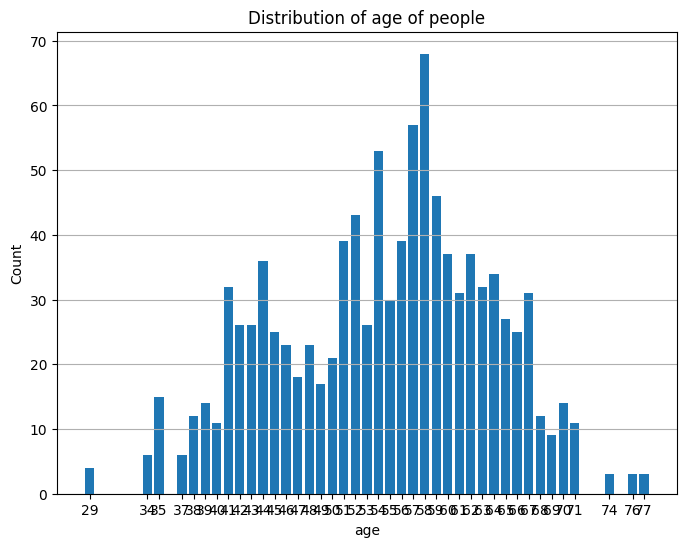

In [17]:





age_counts = df['age'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of age of people')
plt.xticks(age_counts.index)
plt.grid(axis='y')
plt.show()

PIE CHART

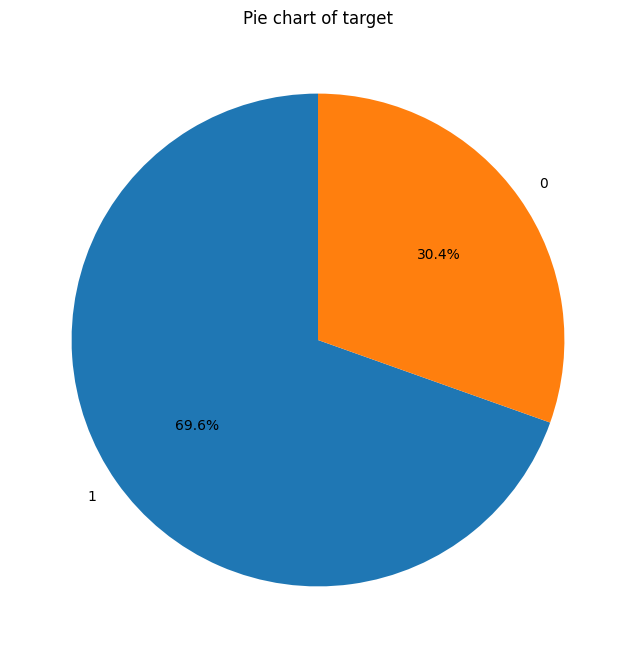

In [25]:





quality_counts = df['sex'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart of target')
plt.show()

DETECTING OUTLIERS


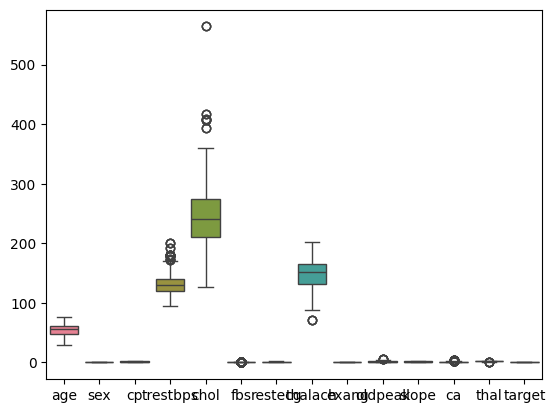

In [34]:

sns.boxplot(data=df)
plt.show()



removing the outliners using IQR method

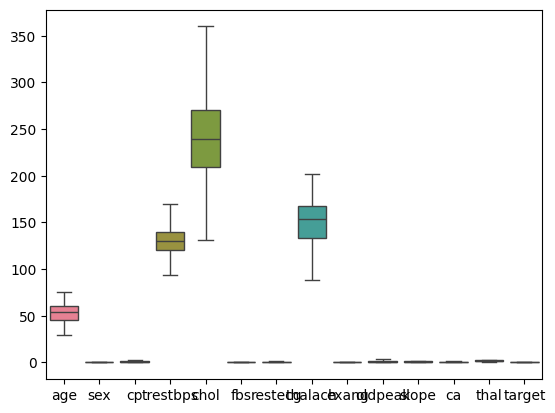

In [39]:
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']




Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]


sns.boxplot(data=filtered_data)
plt.show()


filtered_data.to_csv('filtered_data.csv', index=False)

SCATTER PLOT


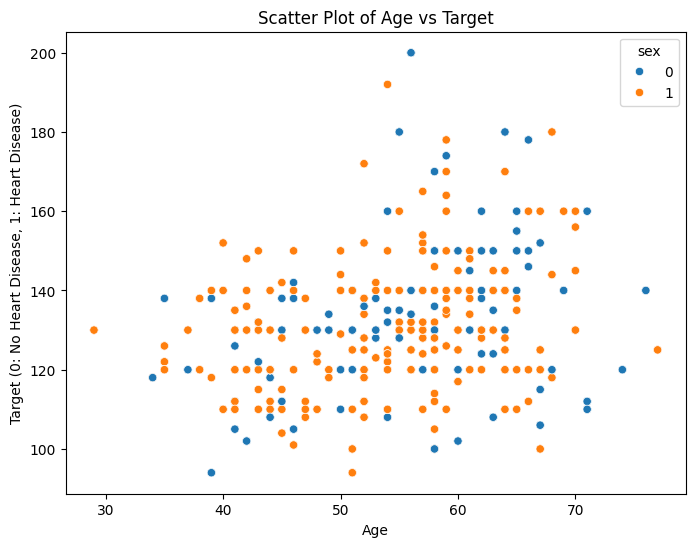

In [41]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='age', y='trestbps', data=df, hue='sex')  # Color points by 'sex'
plt.title('Scatter Plot of Age vs Target')
plt.xlabel('Age')
plt.ylabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.show()

HEAT MAP


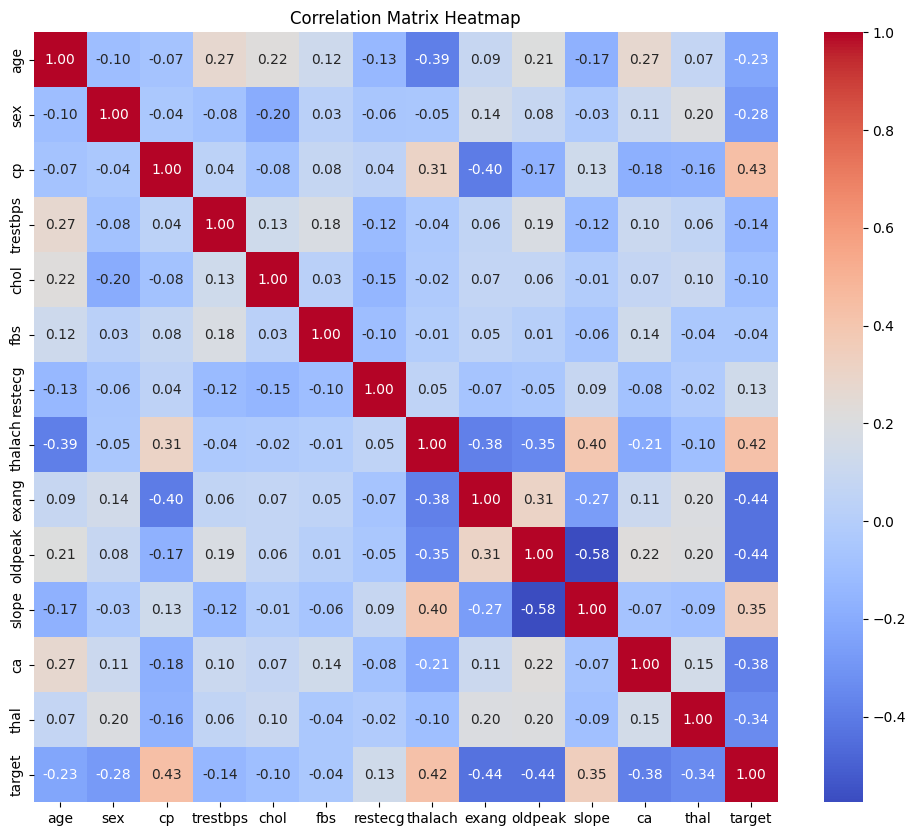

In [46]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [52]:

X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)